<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310__Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3 - Imputations, Functions with Python, Scalings, Probability and Monte Carlo Simulations

In [1]:
import numpy as np
import pandas as pd

In [5]:
dat = pd.read_csv('drive/MyDrive/Colab_Notebooks/L1Data.csv')

In [6]:
dat

,Class,Age,Funds,Sale
0,Freshmen,18.0,600.0,No
1,Freshmen,18.0,500.0,No
2,Freshmen,18.0,600.0,No
3,Senior,23.0,800.0,No
4,Junior,21.0,400.0,Yes
5,Freshmen,19.0,600.0,No
6,Freshmen,20.0,600.0,No
7,Senior,24.0,NaN,Yes
8,Sophomore,23.0,620.0,Yes
9,Sophomore,25.0,800.0,Yes


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We show how to subset the dataframe (we are using the .loc attribute for the the dataframe)

In [7]:
dat.loc[dat.Class=="Sophomore",["Age"]]

,Age
8,23.0
9,25.0
12,NaN
15,21.0
16,20.0
20,NaN


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp = SimpleImputer(missing_values=np.nan,strategy='median')
imp.fit(dat.loc[:,["Age"]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [10]:
dat.loc[:,["Age"]] = imp.transform(dat.loc[:,["Age"]])

In [11]:
dat.loc[dat.Class=="Sophomore",["Age"]]

,Age
8,23.0
9,25.0
12,21.0
15,21.0
16,20.0
20,21.0


## <font color='blue'> Features and Independent Variables </font>

<font color='red'>IMPORTANT: Not all features are "independent"</font>

What is a feature?
	- A feature is something you are going to use to predict a dependent or response variable.

What is a feature matrix?
	- A feature matrix is a matrix of all the features you are going to use to make the prediction.

What is an independent variable?
	- A different word for a feature.

What is the goal? We want to combine features in a functional way so we need some form of scaling (standardization) in order to perform operations with *fruit of the same kind* such as euclidean distance calculations, etc.

The idea is that we cannot add directly *meters* and *feet* and therefore we need a scaling in the same metric.

## <font color='blue'>  Scaling Data </font>

The are many different techniques for data standardization. We can scale numerical values by using:

  - z-scores: $\frac{x-\mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ is the standard deviation.
  - quantiles: every data point is replaced by its percentile within the feature column.
  - division by max: $\frac{x}{\max{(x)}}.$
  - 0 to 1 scaling: $\frac{x-\min{(x)}}{\max{(x)}-\min{(x)}}.$
  - "traditional" standardization (e.g. old HDI): $\frac{\max{(x)}-x}{\max{(x)}-\min{(x)}}.$
  - division by the range.
  - division by the standard deviation.
  - proportion of external indicator (i.e. in terms of a predefined metric).

  ### <font color="green"> Practical exercise: write your own Python functions to implement the different standardization techniques </font>

Example of implementing the 0 to 1 scaling:

In [12]:
def zero_to_one(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))

In [13]:
v = np.array([1,2,3,4,5,9,11])
zero_to_one(v)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.8, 1. ])



##  <font color='blue'>Functions with Python</font>

A function is a mapping, a rule of correspondence such that an input is assigned exacly one output. 

<font color='green'>*Crtical Thinking: Functions and Set Theory represent the building blocks of modern science.*</font>


<figure>
<center>
<img src='https://drive.google.com/uc?id=1Gxk37Bbbzw5pq2naZjxLNUkHC2GioPLJ' 
width='300px' />
<figcaption>Example of a Function by Arrow Diagram</figcaption></center>
</figure>

The important elements of a function are 
> i\. the <font color='lightpink'>*domain*</font> of the function\
> ii\. the <font color='lightpink'>*range*</font> of the function\
> iii\. the <font color='lightpink'>*definition*</font> of the function.

Let's create some examples in Python:

<font color='skyblue'>**Example 1**</font> Create a function whose graph intersects the line $y=0.5$ exactly three times.

*Solution:* We think of a simple possible design that accomodates the requirement such as the construct of a third degree polynomial: 

$$
p(x) = (x-1)\cdot(x-2)\cdot(x-3)+0.5
$$


```python
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return (x-1)*(x-2)*(x-3)+0.5

t = np.arange(0.0,4.0,0.01)
s = f(t) 
plt.plot(t,s)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel('Input',fontsize=14,color='lightgreen')
plt.tick_params(axis='x', colors='cyan')
plt.tick_params(axis='y', colors='cyan')
plt.ylabel('Output',fontsize=14,color='lightgreen')
plt.grid(True)
```



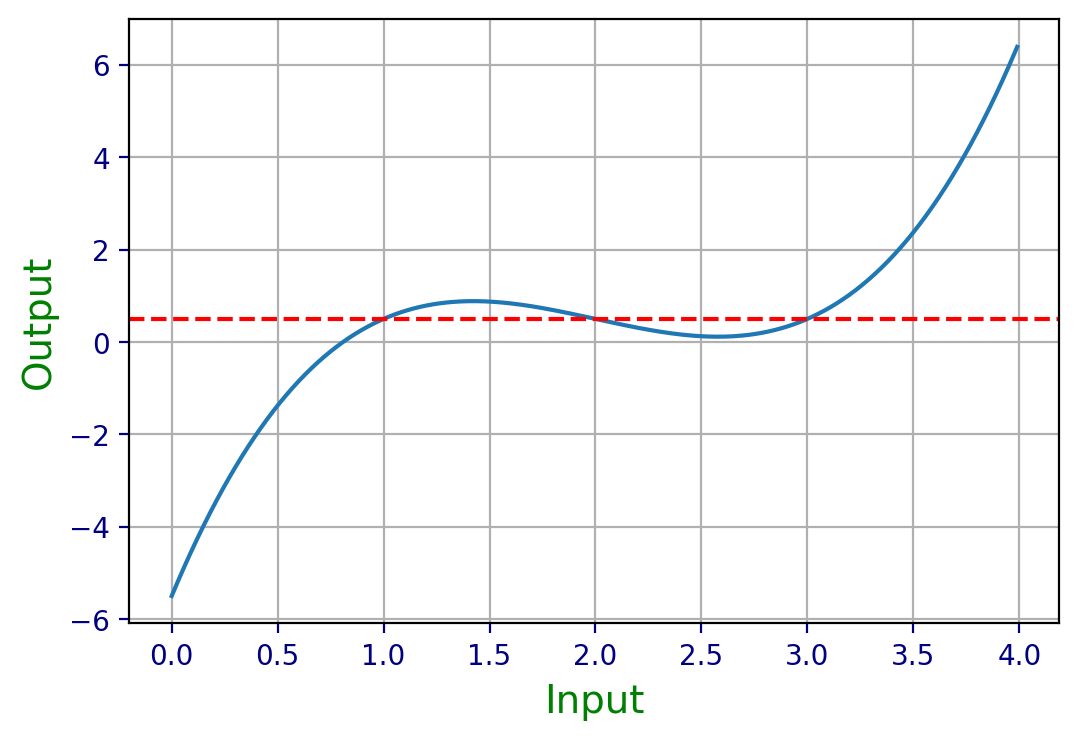

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return (x-1)*(x-2)*(x-3)+0.5

t = np.arange(0.0,4.0,0.01)
s = f(t) 
plt.plot(t,s)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel('Input',fontsize=14,color='green')
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.ylabel('Output',fontsize=14,color='green')
plt.grid(True)

<font color='skyblue'>**Example 2**</font> Create a piecewise defined function with three different cases.

*Solution:* Again, we can think of a simple example such as

$$
f(x) = \begin{cases}
x &\text{if}\,\,\,0<x<1\\
\sqrt{x} & \text{if}\,\,\,1\leq x<2\\
\sin(x) & \text{if}\,\,\,2\leq x<4
\end{cases}
$$

Hint: for Python programming consider <font color='plum'>*if*, *elif*</font> and <font color='plum'>*else*</font> statements. 

In [15]:
def f(x):
  if (0<x) & (x<1):
    return x
  elif (1<=x) & (x<2):
    return np.sqrt(x)
  else:
    return np.sin(x)

In [16]:
f(3)

0.1411200080598672

## <font color='cyan'>Probability</font>

The main idea can be explained in simple terms:

If $A$ is some event then the probability of $A$ can be understood as its frequency of occurring. Thus we understand that the probability is always a number $p$ such that 

$$0\leq p\leq 1$$

The probability of the event $A$ can be denoted by $$P(A)$$ and if we have finitely many outcomes  then $$P(A):=\frac{n(A)}{n(X)}$$ where $n(A)$ represents the number of favorable outcomes to $A$ and $n(X)$ represents the total number of outcomes. If we think of repeating an experiment finitely many times where $A$ is a possible outcome, then $P(A)$ can be approximated by the relative frequency of occurrence provided we repeated the experiment *sufficiently* many times.

In practice the study of continuous random variables and different probability distributions is extremely important.

### <font color='skyblue'> Example</font>

In Python, we can use many different probability distributions. The following code demonstrates the *uniform* distribution and the *normal* distribution.

Code to display a histogram and the fit for a uniform distribution:
```python
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns
sns.set(color_codes=True)

# import uniform distribution
from scipy import stats
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Uniform ', ylabel='Frequency')
```



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform ')]

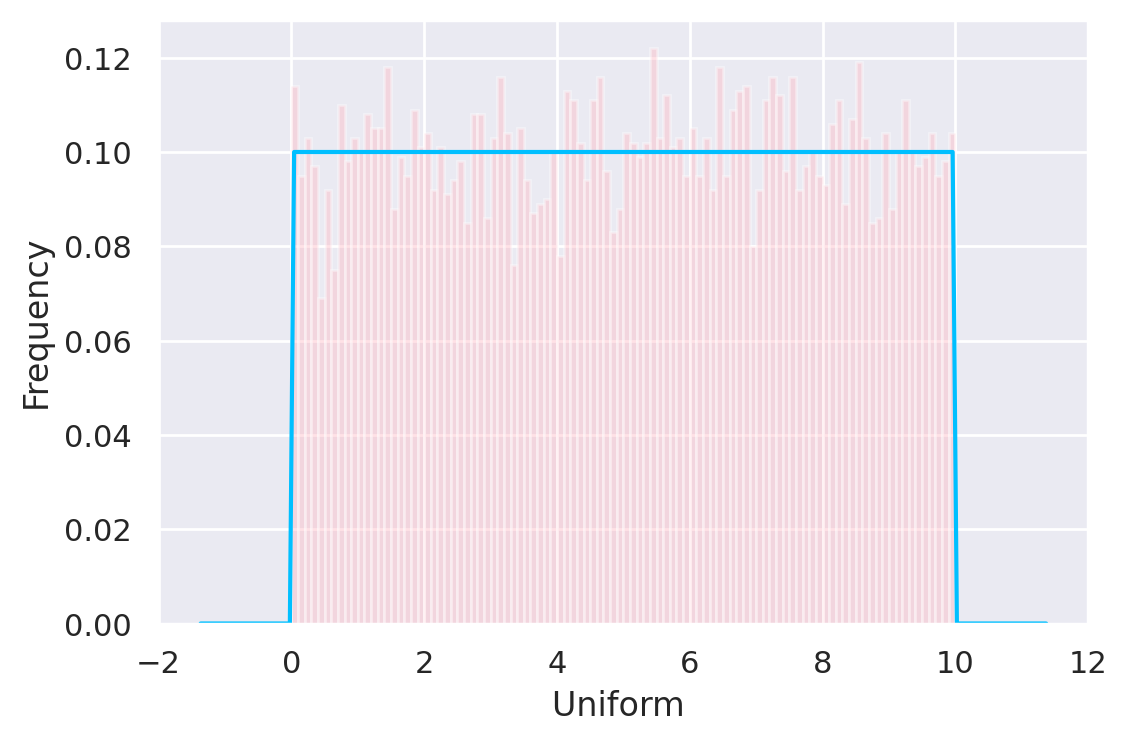

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
 
# import seaborn
import seaborn as sns
sns.set(color_codes=True)
 
# import uniform distribution
from scipy import stats
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b)
 
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Uniform ', ylabel='Frequency')

Code to display a histogram and the fit for a normal distribution:

```python
from scipy.stats import norm
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)
# then we want to display the histogram and the fit of the underlying distribution:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.gamma,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Normal', ylabel='Frequency')
```

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

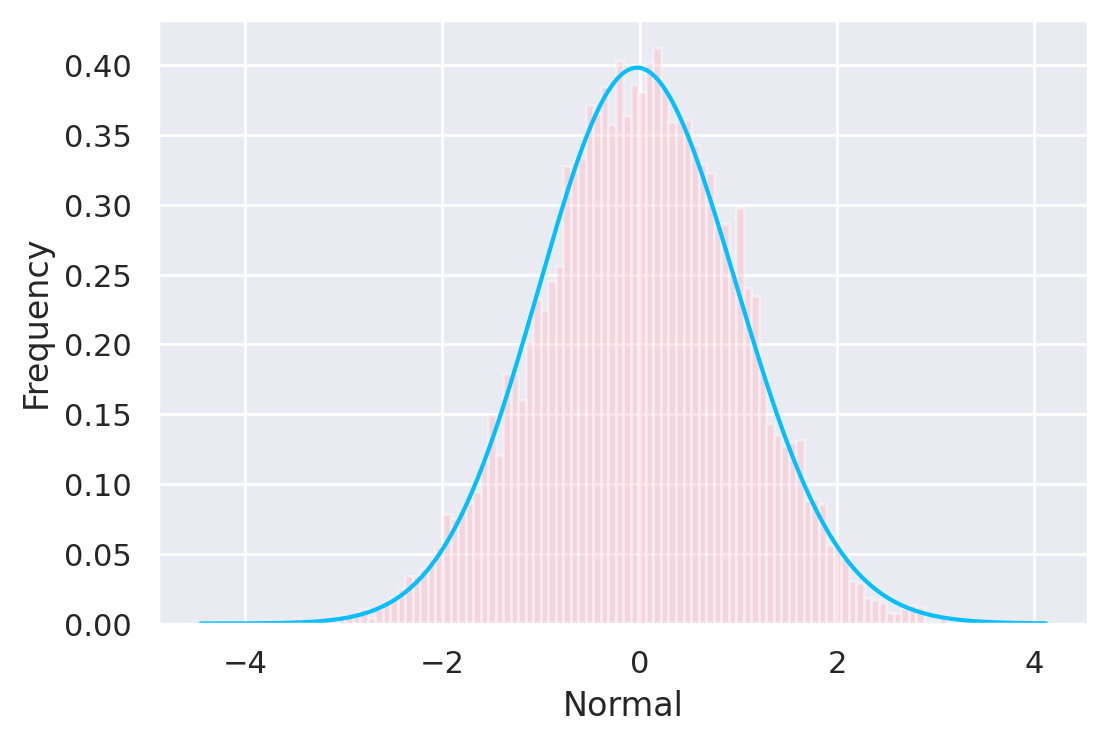

In [18]:
from scipy.stats import norm
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)
# then we want to display the histogram and the fit of the underlying distribution:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.gamma,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Normal', ylabel='Frequency')

## <font color='blue'> Bayesian Theorem</font>

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}}$$

Where $P(A|B)$ means the probability of event $A$ provided event $B$ holds.

The main idea comes from the conditional probability rule:

$$\Large{P(A\cap B) = P(A)\cdot P(B\,|\,A) = P(B)\cdot P(A\,|\,B)}$$

The intuition could be presented in a visual way:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1O2Hg3q1RwxmxDuoi5pqG4W8Xnqb7zA1C'
width='500px' />
<figcaption>Example of conditional events by using a Venn Diagram</figcaption></center>
</figure>

where $\large{P(A)=\displaystyle\frac{Area(A)}{Area(S)}}$ $\large{P(B)=\displaystyle\frac{Area(B)}{Area(S)}}$ and $\large{P(A\cap B)=\displaystyle\frac{Area(A\cap B)}{Area(S)}}.$


<font color='lightsalmon'>**Critical thinking question**: What is $P(A\,|\,B)$? 
</font>

### <font color='darkpink'>Bayesian Inference </font>

$$\Large{P(H\,|\,\text{data})}=\frac{P(\text{data}\,|\,H )\cdot P(H)}{P(\text{data})}$$

<font color='darkgreen'>**Terminology**</font>


- <font color='deepskyblue'>*Posterior*</font>: How probable is our hypothesis given the data observations (the specific evidence we collected)?


- <font color='deepskyblue'>*Likelihood*</font>: It represents how probable is the evidence given that our hypothesis is true.

- <font color='deepskyblue'>*Prior*</font>: How probable or frequent is our hypothesis in general?

- <font color='deepskyblue'>*Marginal*</font>: How probable is the new evidence under all possible hypotheses?

- In order to make a classification we want to know the *posterior distribution*.

- In the classification algorithm we maximize the likelihood.

- The *prior* distribution is assumed known.

- The probability of the data is assumed constant.

### <font color='skyblue'> Example: </font>

- Assume that $18\%$ of the population has a disease and label this event by $A$.
- Assume that $20\%$ of the population has the symptom (label the event of someone having the symptom by $B$) and that of those who have the disease, about $35\%$ have the symptom.

What is the probability that someone who has the symptom actually has the disease?

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}=\frac{0.35\cdot 0.18}{0.20}=0.315}$$


In [19]:
0.7*0.15/0.3

0.35

## <font color='cyan'>Monte Carlo Simulations</font>

The main goal is to solve problems of data science by approximating probability values via carefully designed simulations. 

<font color='lightsalmon'>**Critical Thinking**</font>: we want to be problem solvers and we can address many practical questions by using repeated sampling from known distributions along with carefully qualified mathematical considerations.

<font color='skyblue'> Example 1. (with Python coding): </font> Flipping a coin and experimentally determining the probability of heads or tails.

```python
import random
import numpy as np
import matplotlib.pyplot as plt

def coin_flip():
  return random.randint(0,1)

# create an empty list to store all probability values
listp = []

# create the Monte Carlo simulation function
def monte_carlo(n):
  results = 0;
  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result

    #compute probability
    prob_val = results/(i+1)

    # update the list of probability values
    listp.append(prob_val)

  return results/n

answer = monte_carlo(5000)

# plot the results

plt.axhline(y=0.5, color = 'red')
plt.plot(listp)
plt.xlabel("Iterations",color='dodgerblue')
plt.ylabel("Probability",color='seagreen')

```

In [20]:
import random

In [21]:
random.randint(0,1)

0

Text(0, 0.5, 'Probability')

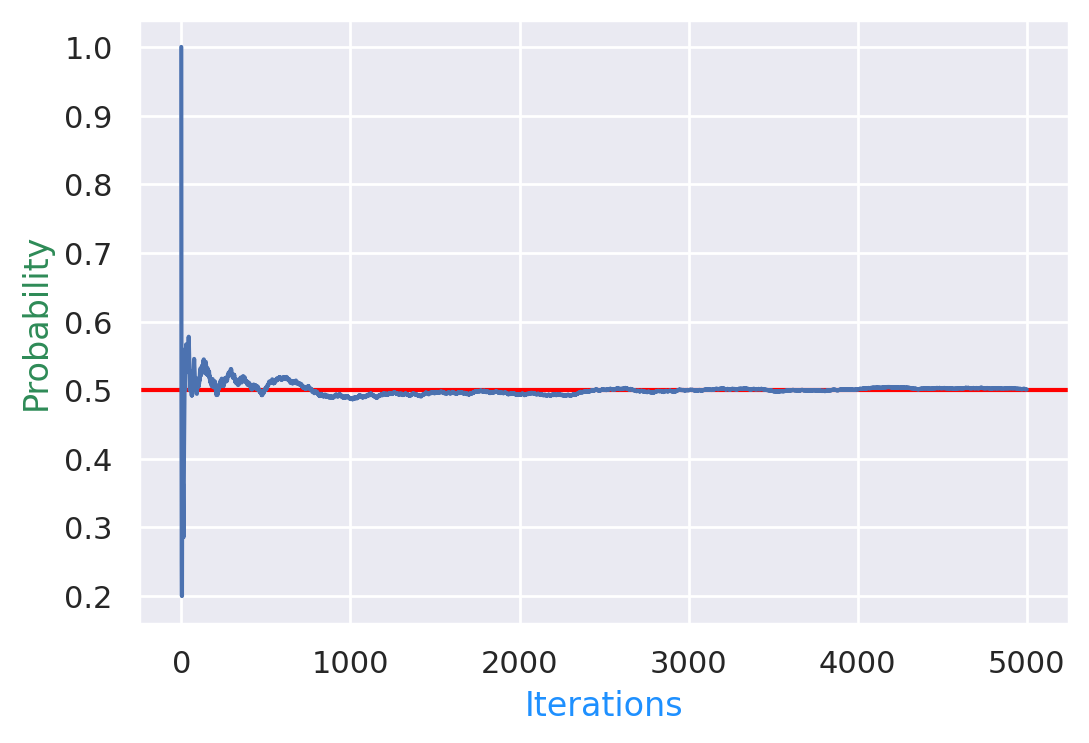

In [22]:
def coin_flip():
  return random.randint(0,1)
 
# create an empty list to store all probability values
listp = []
 
# create the Monte Carlo simulation function
def monte_carlo(n):
  results = 0;
  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result
 
    #compute probability
    prob_val = results/(i+1)
 
    # update the list of probability values
    listp.append(prob_val)
 
  return results/n
 
answer = monte_carlo(5000)
 
# plot the results
 
plt.axhline(y=0.5, color = 'red')
plt.plot(listp)
plt.xlabel("Iterations",color='dodgerblue')
plt.ylabel("Probability",color='seagreen')